In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from tqdm import tqdm

# 04.05 데이터 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hanyang_repo/별따러가자/데이터 수집 수행/04.05_riding_labeled.csv')
# column_lists = ["DATE","ID","ACCEL_X","ACCEL_Y","ACCEL_Z","GYRO_X","GYRO_Y","GYRO_Z","PITCH","ROLL","LAT","LON","VELOCITY","ALT","EVENT0","EVENT1","EVENT2","EVENT3"]
# df.columns = column_lists
df['DATE'] = pd.to_datetime(df['DATE'])

## 컬럼추가 

In [12]:
df['indo'] = 0 
df['chado'] = 0 
df['jumja'] = 0

## 라벨링 

### 1차영상 
- 4월5일 9시 56분 9초 ~ 4월5일 10시 00분 7초 

In [13]:
#1차 영상 기준 시간 
std_time = pd.to_datetime(['2022-04-05 09:56:09'])

In [ ]:
df['group'] = 0

In [14]:
def make_label(t_i,t_f,col,df,index):
    temp_df= df 
    lower_time = std_time + np.timedelta64(t_i,'s')
    upper_time = std_time + np.timedelta64(t_f,'s')
    temp_df.loc[(temp_df['DATE'] >= lower_time[0]) & (temp_df['DATE']<=upper_time[0]),col] = 1
    temp_df.loc[(temp_df['DATE'] >= lower_time[0]) & (temp_df['DATE']<=upper_time[0]),'group'] = index
    return temp_df

In [16]:
a = []
while(True):
    print('시작시간')
    t_i = int(input())
    print('종료시간')
    t_f = int(input())
    print('컬럼')
    col = input() 
    a.append([t_i,t_f,col])
    if t_i == 'break':
        break

시작시간
0
종료시간
39
컬럼
indo
시작시간


KeyboardInterrupt: ignored

In [ ]:
# indo chado jumja

In [ ]:
a = [[0, 39, 'indo'],
 [39, 40, 'jumja'],
 [40, 41, 'chado'],
 [41, 42, 'jumja'],
 [42, 52, 'indo'],
 [52, 54, 'jumja'],
 [54, 55, 'chado'],
 [55, 57, 'jumja'],
 [57, 68, 'indo'],
 [68, 70, 'chado'],
 [70, 73, 'jumja'],
 [73, 76, 'chado'],
 [76, 77, 'jumja'],
 [77, 138, 'indo'],
 [138, 141, 'chado'],
 [141, 147, 'indo'],
 [147, 148, 'jumja'],
 [148, 150, 'chado'],
 [150, 189, 'indo'],
 [189, 388, 'indo'],
 [388, 409, 'chado'],
 [409, 424, 'indo'],
 [424, 425, 'jumja'],
 [425, 455, 'chado'],
 [455, 463, 'jumja'],
 [463, 492, 'indo'],
 [492, 494, 'chado'],
 [605, 610, 'jumja']]

In [ ]:
a = pd.DataFrame(a)
a[3] = np.arange(28)
a = np.array(a)

In [ ]:
for i in tqdm(a):
    df = make_label(i[0],i[1],i[2],df,i[3])

100%|█████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 307.49it/s]


### 2차 영상 
- 4월 5일 10시 00분 15초 ~ 4월 5일 10시 12분 59초 

In [ ]:
std_time = pd.to_datetime(['2022-04-05 10:00:15']) 

In [ ]:
# # b = []
# while(True):
#     print('시작시간')
#     t_i = int(input())
#     print('종료시간')
#     t_f = int(input())
#     print('컬럼')
#     col = input() 
#     b.append([t_i,t_f,col])
#     if t_i == 'break':
#         break

In [ ]:
b = [[0, 39, 'indo'],
 [39, 40, 'jumja'],
 [40, 41, 'chado'],
 [41, 42, 'jumja'],
 [42, 52, 'indo'],
 [52, 54, 'jumja'],
 [54, 55, 'chado'],
 [55, 57, 'jumja'],
 [57, 68, 'indo'],
 [68, 70, 'chado'],
 [70, 73, 'jumja'],
 [73, 76, 'chado'],
 [76, 77, 'jumja'],
 [77, 138, 'indo'],
 [138, 141, 'chado'],
 [141, 147, 'indo'],
 [147, 148, 'jumja'],
 [148, 150, 'chado'],
 [150, 189, 'indo'],
 [189, 208, 'indo'],
 [208, 388, 'indo'],
 [388, 409, 'chado'],
 [409, 424, 'indo'],
 [424, 425, 'jumja'],
 [425, 455, 'chado'],
 [455, 462, 'jumja'],
 [462, 492, 'indo'],
 [492, 494, 'chado'],
 [494, 605, 'indo'],
 [605, 610, 'jumja']]

array([28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
       45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57])

In [ ]:
b = pd.DataFrame(b)
b[3] = np.arange(28,58)
b = np.array(b)

In [ ]:
for i in tqdm(b):
    df = make_label(i[0],i[1],i[2],df,i[3])

100%|█████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 315.07it/s]


In [ ]:
df = df.reset_index()

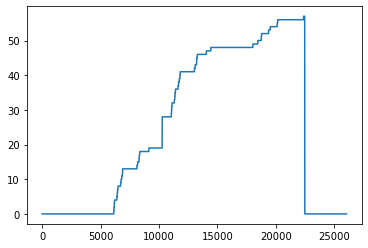

In [ ]:
plt.plot(df['group'])

In [ ]:
df.to_csv('04.05_riding_labeled.csv',index=False)